# Classification Project: Bank Churn

### Dataset used https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling/data which is a subset from https://archive.ics.uci.edu/dataset/222/bank+marketing

The State s just califonia

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.

The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing relevant sklearn modules for split, scaling and metrics evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier # Using Desicion Tree Classifier
from sklearn.linear_model import LogisticRegression # Using Logistic Regression Classifier
from sklearn.ensemble import RandomForestClassifier # Using Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier # Using KNN Classifier

from imblearn.over_sampling import RandomOverSampler # Applying Over Sampling
from imblearn.under_sampling import RandomUnderSampler # Applying Under Sampling

from sklearn.model_selection import GridSearchCV # Using Grid Search CV for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV # Using Randomized Search CV for hyperparameter tuning

In [54]:
# connect to google drive to run the code on colab
from google.colab.drive import mount
mount('/content/drive')
path = "/content/drive/MyDrive/Salford/Classification/Bank_Personal_Loan_Modelling.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
loan_data = pd.read_csv(path)
data = loan_data.copy()

In [56]:
# checking the number of rows and columns in the data
data.shape

(5000, 14)

In [57]:
# display the frist 5 rows
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [58]:
# display the last 5 rows
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [59]:
# getting the statistical analysis of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [60]:
# The minimum value of experience is -3 and it's not possible to have negative experience
# so we'll set any experience less than zero to zero
data['Experience'] = data['Experience'].apply(lambda x: 0 if x < 0 else x)

In [61]:
# getting the number of unique data entries in each column
data.nunique()

,0
ID,5000
Age,45
Experience,44
Income,162
ZIP Code,467
Family,4
CCAvg,108
Education,3
Mortgage,347
Personal Loan,2


In [62]:
# Dropping the ID column as it doesn't help in classification
data = data.drop('ID', axis=1)

In [63]:
data.isna().sum()

,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0
Securities Account,0


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


### Observation

- The Dataset is organized and in the right format which makes it easily useable and takes away the hastle of cleaning up.
- All datatypes are represented in the right format.
- There are no missing values to treat



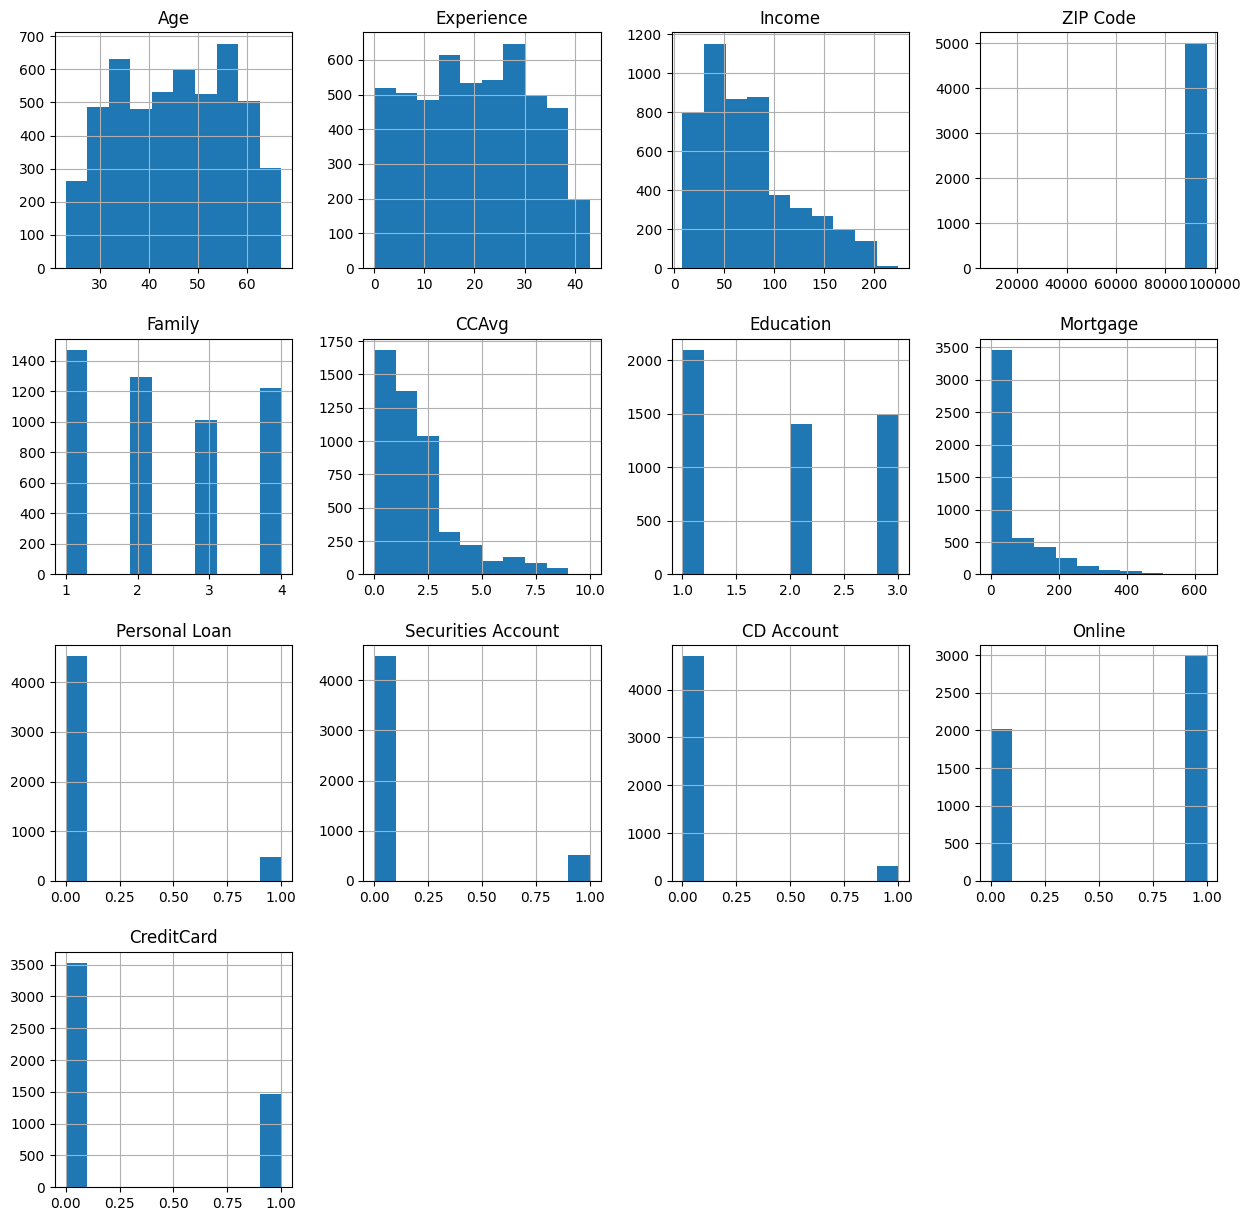

In [65]:
data.hist(figsize=(15, 15))
plt.show()

#### Univariate EDA Observation
- The Age and Experience are almost normally distributed, which shows a broad scope taken across a wide range.
-

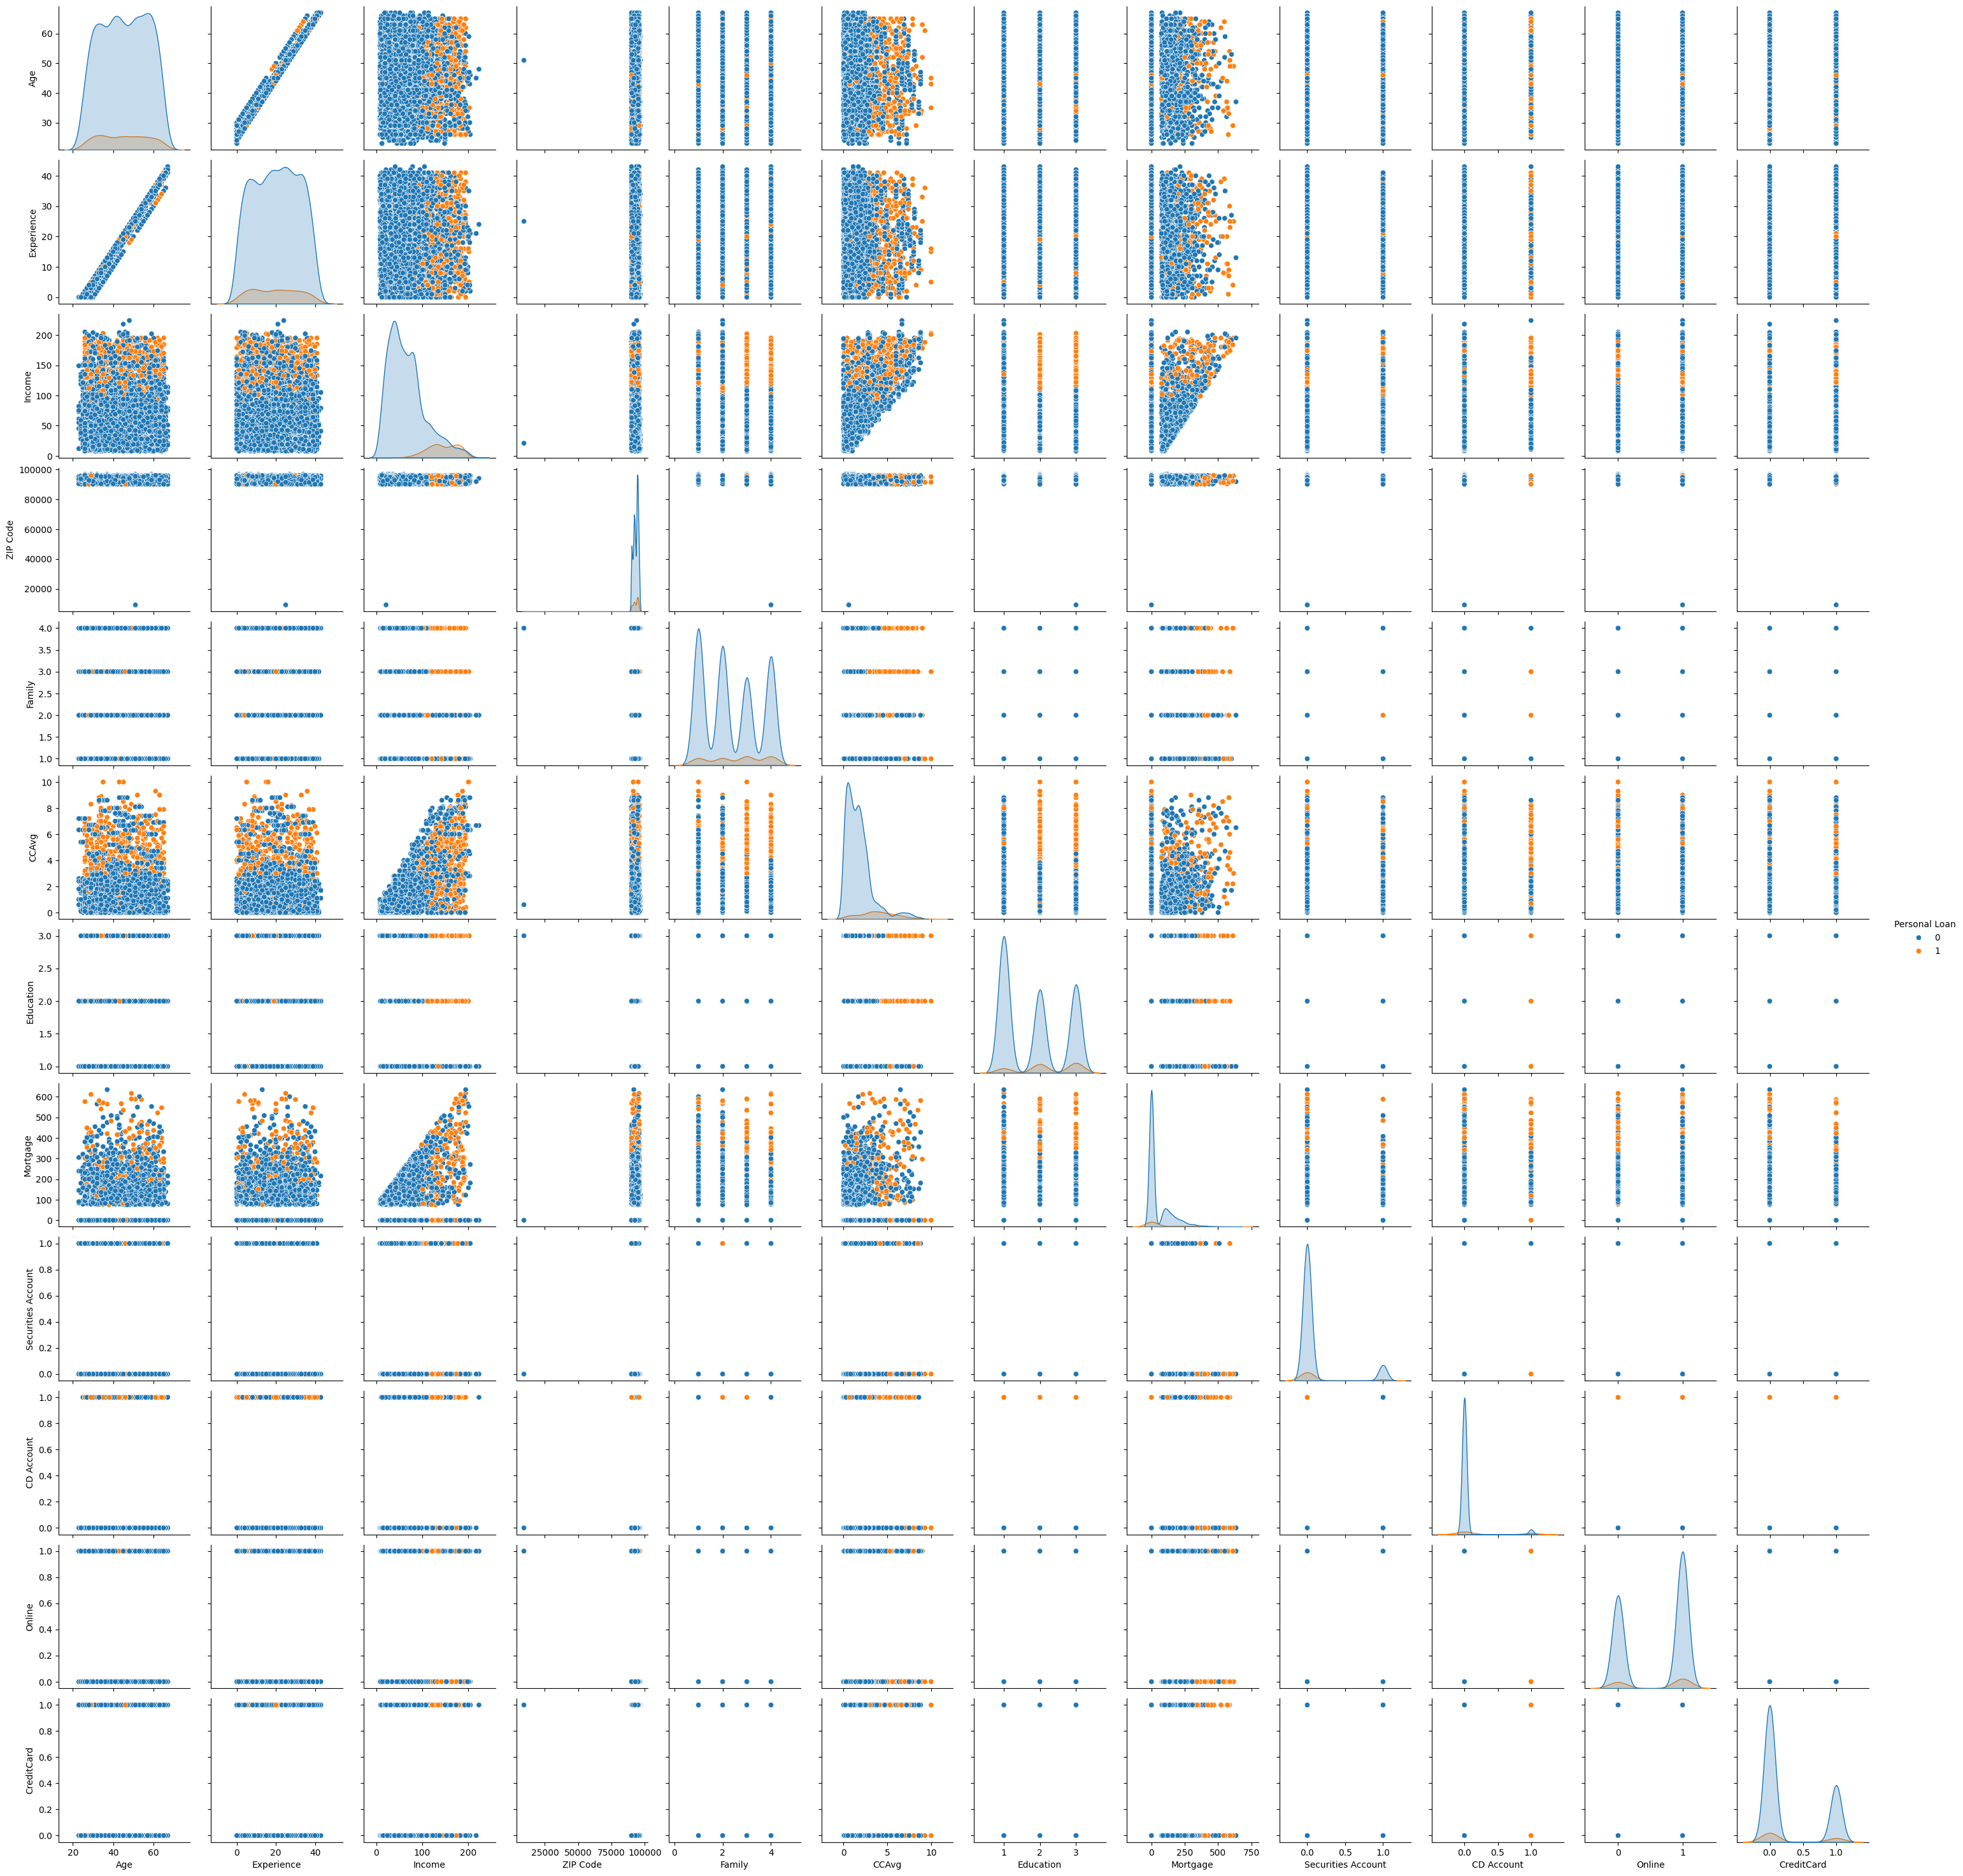

In [66]:
sns.pairplot(data, hue='Personal Loan')
plt.show()

In [67]:
# Converting the zipcodes to states

import pgeocode

nomi = pgeocode.Nominatim('us')

cities = []

for index, codes in data['ZIP Code'].items():
  result = nomi.query_postal_code(str(codes))

  if not result.empty and result['place_name']: # Check if a place_name was found
      cities.append(result['place_name'])
  else:
      cities.append(None) # Append None if no place_name is found


# assign the list to the column
data['City'] = cities

data[['ZIP Code', 'City']].head()

,ZIP Code,City
0,91107,Pasadena
1,90089,Los Angeles
2,94720,Berkeley
3,94112,San Francisco
4,91330,Northridge


In [68]:
# Dropping the ZIP Code column
data = data.drop('ZIP Code', axis=1)

In [69]:
data.sample(n=5, random_state=42)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,City
1501,30,4,35,2,0.3,2,0,0,1,0,0,1,San Diego
2586,47,23,149,4,6.1,1,0,1,0,0,0,1,San Juan Capistrano
2653,30,5,121,2,3.1,1,408,0,0,0,1,0,Fremont
1055,31,6,62,1,1.0,1,0,0,1,0,1,0,Folsom
705,62,36,30,3,0.7,2,0,0,0,0,1,0,Berkeley


In [70]:
x = data.drop('Personal Loan', axis=1)
y = data['Personal Loan']

### One-hot Encoding

In [71]:
# Handle missing values in the 'City' column
data['City'].fillna('Unknown', inplace=True)

# Perform one-hot encoding on the 'City' column
x_encoded = pd.get_dummies(x, columns=['City'], drop_first=True)

# Display the first few rows and the columns to see the effect of one-hot encoding
display(x_encoded.head())
print("\nColumns after one-hot encoding:")
print(x_encoded.columns)

/tmp/ipython-input-2287109182.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['City'].fillna('Unknown', inplace=True)


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,...,City_Vista,City_Walnut Creek,City_Weed,City_West Covina,City_West Sacramento,City_Westlake Village,City_Whittier,City_Woodland Hills,City_Yorba Linda,City_Yucaipa
0,25,1,49,4,1.6,1,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
1,45,19,34,3,1.5,1,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
2,39,15,11,1,1.0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,35,9,100,1,2.7,2,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,35,8,45,4,1.0,2,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False



Columns after one-hot encoding:
Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online',
       ...
       'City_Vista', 'City_Walnut Creek', 'City_Weed', 'City_West Covina',
       'City_West Sacramento', 'City_Westlake Village', 'City_Whittier',
       'City_Woodland Hills', 'City_Yorba Linda', 'City_Yucaipa'],
      dtype='object', length=254)


In [72]:
# Use the one-hot encoded features (x_encoded) for splitting
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

### Feature Scaling

In [73]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


display(x_train_scaled)

array([[-1.15806671, -1.14041928,  0.80587236, ..., -0.05006262,
        -0.0273964 , -0.02236627],
       [-0.54667317, -0.61547513, -0.12844092, ..., -0.05006262,
        -0.0273964 , -0.02236627],
       [-1.24540864, -1.14041928,  2.15302174, ..., -0.05006262,
        -0.0273964 , -0.02236627],
       ...,
       [-0.19730543, -0.17802168,  0.8493288 , ..., -0.05006262,
        -0.0273964 , -0.02236627],
       [-0.89604091, -0.87794721,  1.69672921, ..., -0.05006262,
        -0.0273964 , -0.02236627],
       [ 1.02548165,  0.95935729, -0.95411312, ..., -0.05006262,
        -0.0273964 , -0.02236627]])

## Logistic Regression

### Model Training

In [74]:
# Initialize the Logistic Regression model
logistic_classifier = LogisticRegression(random_state=42)

# Train the model using the scaled training data
logistic_classifier.fit(x_train_scaled, y_train)

LogisticRegression(random_state=42)

### Prediction and Evaluation

In [75]:
# Make predictions on the scaled testing data
y_pred_logistic = logistic_classifier.predict(x_test_scaled)

In [76]:
# Evaluate the Logistic Regression model

# checking the accuracy score
acc_logistic = metrics.accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {acc_logistic}")

print("--------------------------------------------")

# checking the confusion matrix
cm_logistic = metrics.confusion_matrix(y_test, y_pred_logistic)
print(f"Logistic Regression Confusion Matrix: \n{cm_logistic}")

print("--------------------------------------------")

# checking the classification report across all relevant metrics
result_logistic = metrics.classification_report(y_test, y_pred_logistic)
print(f"Logistic Regression Classification Report: \n{result_logistic}")

Logistic Regression Accuracy: 0.936
--------------------------------------------
Logistic Regression Confusion Matrix: 
[[878  17]
 [ 47  58]]
--------------------------------------------
Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       895
           1       0.77      0.55      0.64       105

    accuracy                           0.94      1000
   macro avg       0.86      0.77      0.80      1000
weighted avg       0.93      0.94      0.93      1000



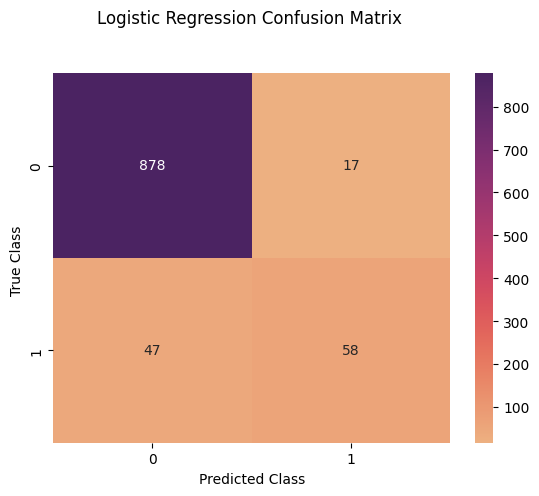

In [77]:
# viewing the confusion matrix on a heat map
ax_logistic = sns.heatmap(cm_logistic, annot=True, cmap='flare', fmt='d')

ax_logistic.set_title('Logistic Regression Confusion Matrix \n\n');
ax_logistic.set_xlabel('Predicted Class')
ax_logistic.set_ylabel('True Class ');

## K-Nearest Neighbors (KNN)

### Model Training

In [78]:
# Initialize the KNeighborsClassifier model
knn_classifier = KNeighborsClassifier()

# Train the model using the scaled training data
knn_classifier.fit(x_train_scaled, y_train)

KNeighborsClassifier()

### Preduction and Evaluation

In [79]:
y_pred_knn = knn_classifier.predict(x_test_scaled)

In [80]:
# checking the accuracy score
acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {acc_knn}")

print("--------------------------------------------")

# checking the confusion matrix
cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)
print(f"KNN Confusion Matrix: \n{cm_knn}")

print("--------------------------------------------")

# checking the classification report across all relevant metrics
result_knn = metrics.classification_report(y_test, y_pred_knn)
print(f"KNN Classification Report: \n{result_knn}")

KNN Accuracy: 0.906
--------------------------------------------
KNN Confusion Matrix: 
[[888   7]
 [ 87  18]]
--------------------------------------------
KNN Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       895
           1       0.72      0.17      0.28       105

    accuracy                           0.91      1000
   macro avg       0.82      0.58      0.61      1000
weighted avg       0.89      0.91      0.88      1000



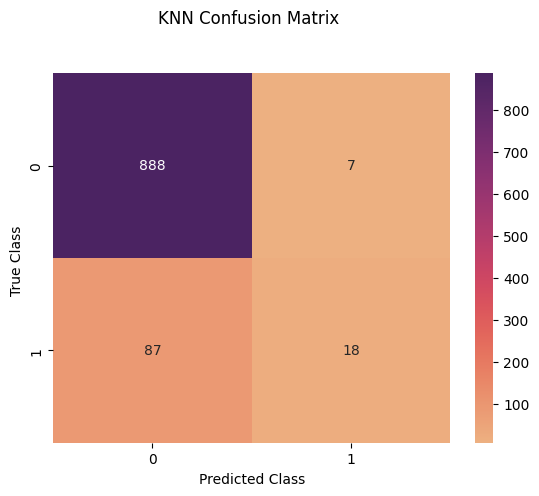

In [81]:
# viewing the confusion matrix on a heat map
ax_knn = sns.heatmap(cm_knn, annot=True, cmap='flare', fmt='d')

ax_knn.set_title('KNN Confusion Matrix \n\n');
ax_knn.set_xlabel('Predicted Class')
ax_knn.set_ylabel('True Class ');

## Decision Tree

### Model Training

In [82]:
# Initialize the Dicision Tree model
dtree_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the classifier using the training data
dtree_classifier.fit(x_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### Prediction and Evaluation

In [83]:
# Make predictions on the scaled testing data
y_pred_dtree = dtree_classifier.predict(x_test_scaled)

In [84]:
# checking the accuracy score
acc_dtree = metrics.accuracy_score(y_test, y_pred_dtree)
print(f"Accuracy: {acc_dtree}")

print("--------------------------------------------")

# checking the confusion matrix
cm_dtree = metrics.confusion_matrix(y_test, y_pred_dtree)
print(f"Confusion Matrix: \n{cm_dtree}")

print("--------------------------------------------")

# checking the classification report across all relevant metrics
result_dtree = metrics.classification_report(y_test, y_pred_dtree)
print(f"Classification Report: \n{result_dtree}")

Accuracy: 0.986
--------------------------------------------
Confusion Matrix: 
[[889   6]
 [  8  97]]
--------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.94      0.92      0.93       105

    accuracy                           0.99      1000
   macro avg       0.97      0.96      0.96      1000
weighted avg       0.99      0.99      0.99      1000



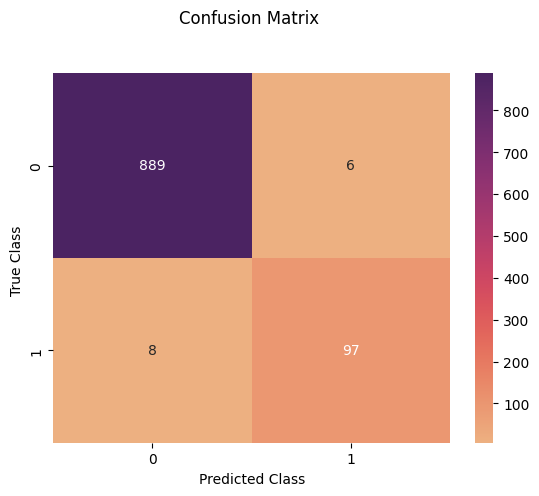

In [85]:
# viewing the confusion matrix on a heat map
ax = sns.heatmap(cm_dtree, annot=True, cmap='flare', fmt='d')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class ');

## Random Forest

### Model Training


In [86]:
# Initialize the Random Forest Classifier model
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model using the scaled training data
rf_classifier.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### Prediction and Evaluation

In [87]:
y_pred_rf = rf_classifier.predict(x_test_scaled)

In [88]:
# Evaluate the Random Forest model

# checking the accuracy score
acc_rf = metrics.accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf}")

print("--------------------------------------------")

# checking the confusion matrix
cm_rf = metrics.confusion_matrix(y_test, y_pred_rf)
print(f"Random Forest Confusion Matrix: \n{cm_rf}")

print("--------------------------------------------")

# checking the classification report across all relevant metrics
result_rf = metrics.classification_report(y_test, y_pred_rf)
print(f"Random Forest Classification Report: \n{result_rf}")

Random Forest Accuracy: 0.988
--------------------------------------------
Random Forest Confusion Matrix: 
[[895   0]
 [ 12  93]]
--------------------------------------------
Random Forest Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       1.00      0.89      0.94       105

    accuracy                           0.99      1000
   macro avg       0.99      0.94      0.97      1000
weighted avg       0.99      0.99      0.99      1000



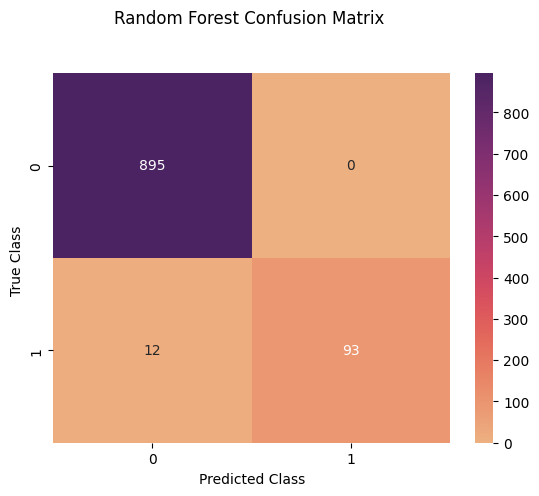

In [89]:
# viewing the confusion matrix on a heat map
ax_rf = sns.heatmap(cm_rf, annot=True, cmap='flare', fmt='d')

ax_rf.set_title('Random Forest Confusion Matrix \n\n');
ax_rf.set_xlabel('Predicted Class')
ax_rf.set_ylabel('True Class ');

## Introduce resampling techniques


demonstrating two common resampling techniques: oversampling the minority class and undersampling the majority class.


In [90]:
print("Original training data class distribution:")
print(y_train.value_counts())

Original training data class distribution:
Personal Loan
0    3625
1     375
Name: count, dtype: int64


### Oversampling the train dataset



In [91]:
# Instantiate RandomOverSampler with a random_state of 42
ros = RandomOverSampler(random_state=42)

# Apply oversampling to the training data
x_train_oversampled, y_train_oversampled = ros.fit_resample(x_train_scaled, y_train)

# Print the value counts of y_train_oversampled
print("\nTraining data class distribution after oversampling:")
print(y_train_oversampled.value_counts())


Training data class distribution after oversampling:
Personal Loan
0    3625
1    3625
Name: count, dtype: int64


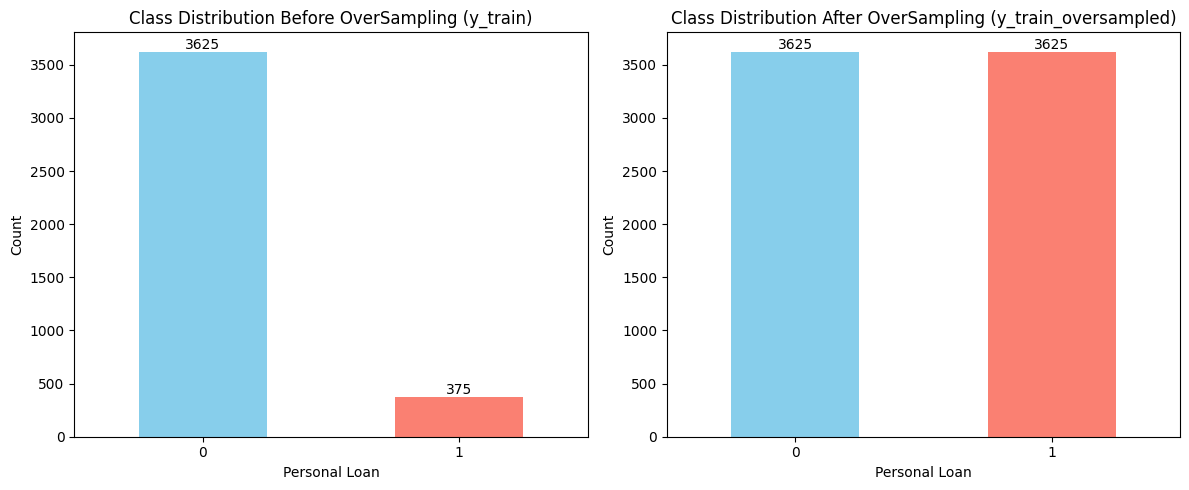

In [115]:
# 3. Visualize class distribution before OverSampling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
ax_before = y_train.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution Before OverSampling (y_train)')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.xticks(rotation=0)
for container in ax_before.containers:
    ax_before.bar_label(container)

# 4. Visualize class distribution after OverSampling
plt.subplot(1, 2, 2)
ax_after = y_train_oversampled.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution After OverSampling (y_train_oversampled)')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.xticks(rotation=0)
for container in ax_after.containers:
    ax_after.bar_label(container)

plt.tight_layout()
plt.show()

### Undersampling the train dataset



In [92]:
# Instantiate RandomUnderSampler with a random_state of 42
rus = RandomUnderSampler(random_state=42)

# Apply undersampling to the training data
x_train_undersampled, y_train_undersampled = rus.fit_resample(x_train_scaled, y_train)

# Print the value counts of y_train_undersampled
print("\nTraining data class distribution after undersampling:")
print(y_train_undersampled.value_counts())


Training data class distribution after undersampling:
Personal Loan
0    375
1    375
Name: count, dtype: int64


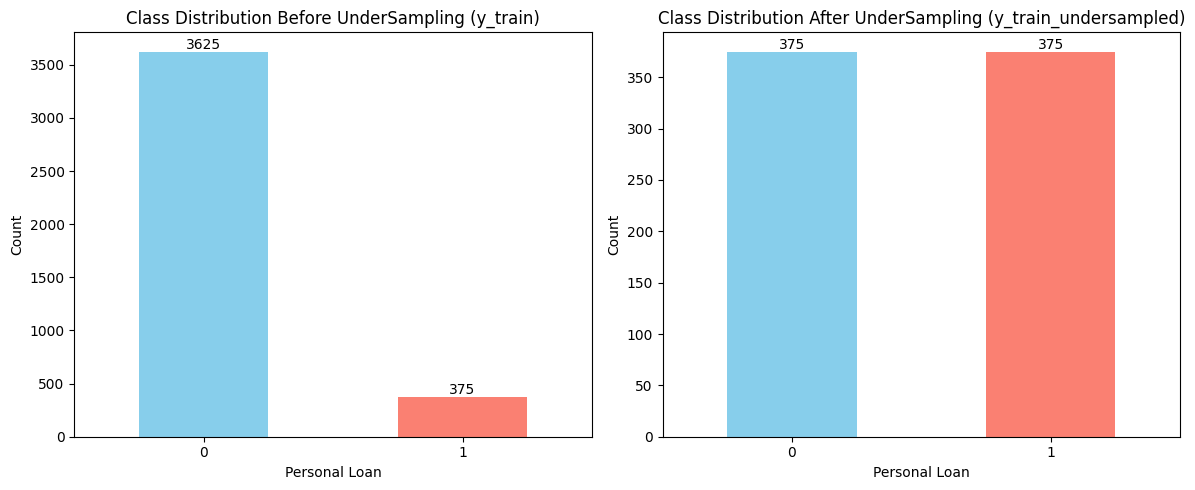

In [117]:
# 3. Visualize class distribution before UnderSampling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
ax_before = y_train.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution Before UnderSampling (y_train)')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.xticks(rotation=0)
for container in ax_before.containers:
    ax_before.bar_label(container)

# 4. Visualize class distribution after UnderSampling
plt.subplot(1, 2, 2)
ax_after = y_train_undersampled.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution After UnderSampling (y_train_undersampled)')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.xticks(rotation=0)
for container in ax_after.containers:
    ax_after.bar_label(container)

plt.tight_layout()
plt.show()

## Logistic Regression Oversampling


### Model Training

In [93]:
# Initialize a LogisticRegression model with random_state=42
logistic_classifier_oversampled = LogisticRegression(random_state=42)

# Train the Logistic Regression model using the oversampled training data
logistic_classifier_oversampled.fit(x_train_oversampled, y_train_oversampled)

LogisticRegression(random_state=42)

### Prediction and Evaluation

In [94]:
# Make predictions on the scaled testing data using the model trained on oversampled data
y_pred_logistic_oversampled = logistic_classifier_oversampled.predict(x_test_scaled)

In [95]:
# Evaluate the performance of the Logistic Regression model trained on oversampled data

# checking the accuracy score
acc_logistic_oversampled = metrics.accuracy_score(y_test, y_pred_logistic_oversampled)
print(f"Logistic Regression Accuracy (Oversampled): {acc_logistic_oversampled}")

print("--------------------------------------------")

# checking the confusion matrix
cm_logistic_oversampled = metrics.confusion_matrix(y_test, y_pred_logistic_oversampled)
print(f"Logistic Regression Confusion Matrix (Oversampled): \n{cm_logistic_oversampled}")

print("--------------------------------------------")

# checking the classification report across all relevant metrix
result_logistic_oversampled = metrics.classification_report(y_test, y_pred_logistic_oversampled)
print(f"Logistic Regression Classification Report (Oversampled): \n{result_logistic_oversampled}")

Logistic Regression Accuracy (Oversampled): 0.901
--------------------------------------------
Logistic Regression Confusion Matrix (Oversampled): 
[[821  74]
 [ 25  80]]
--------------------------------------------
Logistic Regression Classification Report (Oversampled): 
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       895
           1       0.52      0.76      0.62       105

    accuracy                           0.90      1000
   macro avg       0.74      0.84      0.78      1000
weighted avg       0.92      0.90      0.91      1000



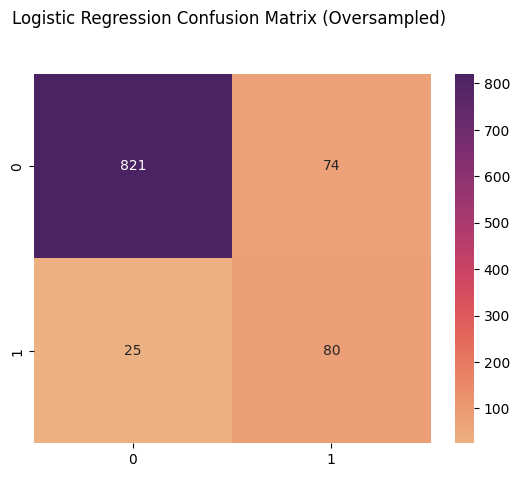

In [96]:
# viewing the confusion matrix on a heat map
ax_logistic_oversampled = sns.heatmap(cm_logistic_oversampled, annot=True, cmap='flare', fmt='d')

ax_logistic_oversampled.set_title('Logistic Regression Confusion Matrix (Oversampled) \n\n');
ax_logistic.set_xlabel('Predicted Class')
ax_logistic.set_ylabel('True Class ');

## Logistic Regression Undersampling


### Model Training

In [97]:
# Initialize a new LogisticRegression model with random_state=42
logistic_classifier_undersampled = LogisticRegression(random_state=42)

# Train the new Logistic Regression model using the undersampled training data
logistic_classifier_undersampled.fit(x_train_undersampled, y_train_undersampled)

LogisticRegression(random_state=42)

### Prediction and Evaluation

In [98]:
# Make predictions on the scaled testing data using the model trained on undersampled data
y_pred_logistic_undersampled = logistic_classifier_undersampled.predict(x_test_scaled)

In [99]:
# Evaluate the performance of the Logistic Regression model trained on undersampled data
acc_logistic_undersampled = metrics.accuracy_score(y_test, y_pred_logistic_undersampled)
print(f"Logistic Regression Accuracy (Undersampled): {acc_logistic_undersampled}")

print("--------------------------------------------")

cm_logistic_undersampled = metrics.confusion_matrix(y_test, y_pred_logistic_undersampled)
print(f"Logistic Regression Confusion Matrix (Undersampled): \n{cm_logistic_undersampled}")

print("--------------------------------------------")

result_logistic_undersampled = metrics.classification_report(y_test, y_pred_logistic_undersampled)
print(f"Logistic Regression Classification Report (Undersampled): \n{result_logistic_undersampled}")

Logistic Regression Accuracy (Undersampled): 0.87
--------------------------------------------
Logistic Regression Confusion Matrix (Undersampled): 
[[777 118]
 [ 12  93]]
--------------------------------------------
Logistic Regression Classification Report (Undersampled): 
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       895
           1       0.44      0.89      0.59       105

    accuracy                           0.87      1000
   macro avg       0.71      0.88      0.76      1000
weighted avg       0.93      0.87      0.89      1000



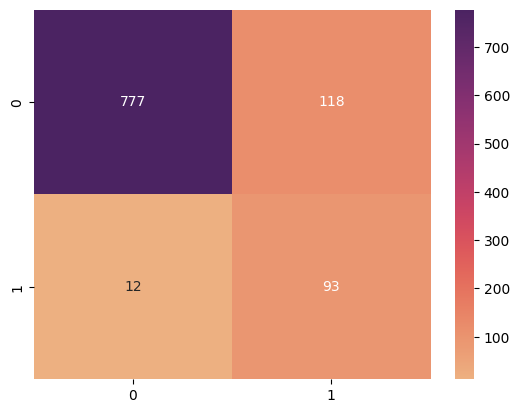

In [100]:
# viewing the confusion matrix on a heat map
ax_logistic_undersampled = sns.heatmap(cm_logistic_undersampled, annot=True, cmap='flare', fmt='d')

ax_logistic_oversampled.set_title('Logistic Regression Confusion Matrix (Undersampled) \n\n');
ax_logistic.set_xlabel('Predicted Class')
ax_logistic.set_ylabel('True Class ');

## KNN Oversampling

### Model Training

In [101]:
# Initialize the KNeighborsClassifier model for oversampled data
knn_classifier_oversampled = KNeighborsClassifier()

# Train the KNN model using the oversampled training data
knn_classifier_oversampled.fit(x_train_oversampled, y_train_oversampled)

KNeighborsClassifier()

### Prediction and Evaluation

In [102]:
# Make predictions on the scaled testing data using the KNN model trained on oversampled data
y_pred_knn_oversampled = knn_classifier_oversampled.predict(x_test_scaled)

In [103]:
# Evaluate the performance of the KNN model trained on oversampled data
acc_knn_oversampled = metrics.accuracy_score(y_test, y_pred_knn_oversampled)
print(f"KNN Accuracy (Oversampled): {acc_knn_oversampled}")

print("--------------------------------------------")

cm_knn_oversampled = metrics.confusion_matrix(y_test, y_pred_knn_oversampled)
print(f"KNN Confusion Matrix (Oversampled): \n{cm_knn_oversampled}")

print("--------------------------------------------")

result_knn_oversampled = metrics.classification_report(y_test, y_pred_knn_oversampled)
print(f"KNN Classification Report (Oversampled): \n{result_knn_oversampled}")

print("============================================")

KNN Accuracy (Oversampled): 0.848
--------------------------------------------
KNN Confusion Matrix (Oversampled): 
[[797  98]
 [ 54  51]]
--------------------------------------------
KNN Classification Report (Oversampled): 
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       895
           1       0.34      0.49      0.40       105

    accuracy                           0.85      1000
   macro avg       0.64      0.69      0.66      1000
weighted avg       0.87      0.85      0.86      1000



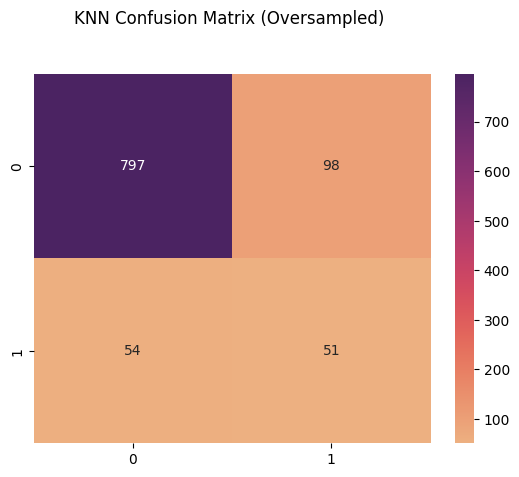

In [104]:
# viewing the confusion matrix on a heat map
ax_knn_oversampled = sns.heatmap(cm_knn_oversampled, annot=True, cmap='flare', fmt='d')

ax_knn_oversampled.set_title('KNN Confusion Matrix (Oversampled) \n\n');
ax_knn.set_xlabel('Predicted Class')
ax_knn.set_ylabel('True Class ');

## KNN Undersampling

### Model Training

In [105]:
# Initialize another KNeighborsClassifier model for undersampled data
knn_classifier_undersampled = KNeighborsClassifier()

# Train this new KNN model using the undersampled training data
knn_classifier_undersampled.fit(x_train_undersampled, y_train_undersampled)

KNeighborsClassifier()

### Prediction and Evaluation

In [106]:
# Make predictions on the scaled testing data using the KNN model trained on undersampled data
y_pred_knn_undersampled = knn_classifier_undersampled.predict(x_test_scaled)

In [107]:
# Evaluate the performance of the KNN model trained on undersampled data
acc_knn_undersampled = metrics.accuracy_score(y_test, y_pred_knn_undersampled)
print(f"KNN Accuracy (Undersampled): {acc_knn_undersampled}")

print("--------------------------------------------")

cm_knn_undersampled = metrics.confusion_matrix(y_test, y_pred_knn_undersampled)
print(f"KNN Confusion Matrix (Undersampled): \n{cm_knn_undersampled}")

print("--------------------------------------------")

result_knn_undersampled = metrics.classification_report(y_test, y_pred_knn_undersampled)
print(f"KNN Classification Report (Undersampled): \n{result_knn_undersampled}")

KNN Accuracy (Undersampled): 0.631
--------------------------------------------
KNN Confusion Matrix (Undersampled): 
[[553 342]
 [ 27  78]]
--------------------------------------------
KNN Classification Report (Undersampled): 
              precision    recall  f1-score   support

           0       0.95      0.62      0.75       895
           1       0.19      0.74      0.30       105

    accuracy                           0.63      1000
   macro avg       0.57      0.68      0.52      1000
weighted avg       0.87      0.63      0.70      1000



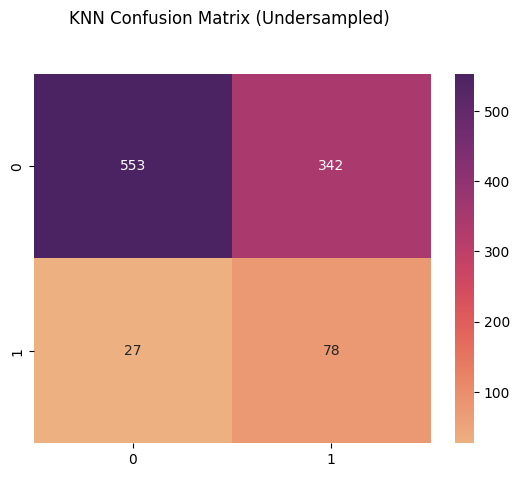

In [108]:
# viewing the confusion matrix on a heat map
ax_knn_undersampled = sns.heatmap(cm_knn_undersampled, annot=True, cmap='flare', fmt='d')

ax_knn_undersampled.set_title('KNN Confusion Matrix (Undersampled) \n\n');
ax_knn.set_xlabel('Predicted Class')
ax_knn.set_ylabel('True Class ');

## Compare model performance


Create a DataFrame to compare the performance metrics of the models before and after resampling, focusing on the minority class (class 1). Populate the DataFrame with accuracy, precision, recall, and F1-score for the original Logistic Regression and KNN models, and their oversampled and undersampled versions.



In [114]:
# Extract metrics for the minority class (class 1)

metrics_Random_Forest = metrics.classification_report(y_test, y_pred_rf, output_dict=True)['1']
metrics_Decision_Tree = metrics.classification_report(y_test, y_pred_dtree, output_dict=True)['1']
metrics_logistic_original = metrics.classification_report(y_test, y_pred_logistic, output_dict=True)['1']
metrics_knn_original = metrics.classification_report(y_test, y_pred_knn, output_dict=True)['1']
metrics_logistic_oversampled = metrics.classification_report(y_test, y_pred_logistic_oversampled, output_dict=True)['1']
metrics_logistic_undersampled = metrics.classification_report(y_test, y_pred_logistic_undersampled, output_dict=True)['1']
metrics_knn_oversampled = metrics.classification_report(y_test, y_pred_knn_oversampled, output_dict=True)['1']
metrics_knn_undersampled = metrics.classification_report(y_test, y_pred_knn_undersampled, output_dict=True)['1']

# Create a DataFrame to store the metrics
performance_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Logistic Regression (Original)', 'KNN (Original)',
              'Logistic Regression (Oversampled)', 'Logistic Regression (Undersampled)',
              'KNN (Oversampled)', 'KNN (Undersampled)'],

    'Accuracy': [acc_rf, acc_dtree, acc_logistic, acc_knn, acc_logistic_oversampled, acc_logistic_undersampled, acc_knn_oversampled, acc_knn_undersampled],

    'Precision (Class 1)': [metrics_Random_Forest['precision'], metrics_Decision_Tree['precision'], metrics_logistic_original['precision'], metrics_knn_original['precision'],
                            metrics_logistic_oversampled['precision'], metrics_logistic_undersampled['precision'],
                            metrics_knn_oversampled['precision'], metrics_knn_undersampled['precision']],

    'Recall (Class 1)': [metrics_Random_Forest['recall'], metrics_Decision_Tree['recall'], metrics_logistic_original['recall'], metrics_knn_original['recall'],
                         metrics_logistic_oversampled['recall'], metrics_logistic_undersampled['recall'],
                         metrics_knn_oversampled['recall'], metrics_knn_undersampled['recall']],

    'F1-Score (Class 1)': [metrics_Random_Forest['f1-score'], metrics_Decision_Tree['f1-score'], metrics_logistic_original['f1-score'], metrics_knn_original['f1-score'],
                           metrics_logistic_oversampled['f1-score'], metrics_logistic_undersampled['f1-score'],
                           metrics_knn_oversampled['f1-score'], metrics_knn_undersampled['f1-score']]
})

# Display the DataFrame
display(performance_comparison)

,Model,Accuracy,Precision (Class 1),Recall (Class 1),F1-Score (Class 1)
0,Random Forest,0.988,1.000000,0.885714,0.939394
1,Decision Tree,0.986,0.941748,0.923810,0.932692
2,Logistic Regression (Original),0.936,0.773333,0.552381,0.644444
3,KNN (Original),0.906,0.720000,0.171429,0.276923
4,Logistic Regression (Oversampled),0.901,0.519481,0.761905,0.617761
5,Logistic Regression (Undersampled),0.870,0.440758,0.885714,0.588608
6,KNN (Oversampled),0.848,0.342282,0.485714,0.401575
7,KNN (Undersampled),0.631,0.185714,0.742857,0.297143


**Reasoning**:
The comparison of performance metrics is completed. Summarize the observations from the performance comparison DataFrame.



In [110]:
print("Performance Comparison Summary:")
print("------------------------------")

print("\nAnalysis of Logistic Regression:")
print(" - Original Logistic Regression had good precision for class 1 but lower recall.")
print(" - Oversampling improved recall for class 1 significantly while slightly decreasing precision.")
print(" - Undersampling further improved recall for class 1 but at the cost of a substantial drop in precision and overall accuracy.")
print(" - For Logistic Regression, oversampling provided a better balance between precision and recall for the minority class compared to undersampling, with a smaller drop in overall accuracy.")

print("\nAnalysis of KNN:")
print(" - Original KNN had low recall and F1-score for class 1, indicating difficulty identifying the minority class.")
print(" - Oversampling improved recall and F1-score for class 1, although precision decreased.")
print(" - Undersampling also improved recall for class 1, but precision dropped significantly, leading to a very low F1-score and overall accuracy.")
print(" - For KNN, oversampling resulted in a better trade-off, improving the minority class performance more effectively than undersampling while maintaining a higher accuracy.")

print("\nOverall Conclusion:")
print(" - Class imbalance negatively impacted the original KNN and Logistic Regression models, particularly in identifying the minority class.")
print(" - Resampling techniques, especially oversampling, helped to mitigate this issue by improving the recall and F1-score for the minority class.")
print(" - The choice of resampling technique and its effectiveness can vary depending on the model and the specific dataset characteristics.")

Performance Comparison Summary:
------------------------------

Analysis of Logistic Regression:
 - Original Logistic Regression had good precision for class 1 but lower recall.
 - Oversampling improved recall for class 1 significantly while slightly decreasing precision.
 - Undersampling further improved recall for class 1 but at the cost of a substantial drop in precision and overall accuracy.
 - For Logistic Regression, oversampling provided a better balance between precision and recall for the minority class compared to undersampling, with a smaller drop in overall accuracy.

Analysis of KNN:
 - Original KNN had low recall and F1-score for class 1, indicating difficulty identifying the minority class.
 - Oversampling improved recall and F1-score for class 1, although precision decreased.
 - Undersampling also improved recall for class 1, but precision dropped significantly, leading to a very low F1-score and overall accuracy.
 - For KNN, oversampling resulted in a better trade-off,

## Summary:

### Data Analysis Key Findings

*   The Random Forest model achieved an accuracy of 0.988 (98.8%) on the test data.
*   The confusion matrix shows that the model correctly classified 895 instances of class 0 and 93 instances of class 1. There were 0 false positives and 12 false negatives.
*   The classification report indicates high precision (0.99 for class 0, 1.00 for class 1) and recall (1.00 for class 0, 0.89 for class 1) for both classes.

### Insights or Next Steps

*   The Random Forest model performed very well, achieving high accuracy and strong performance metrics for both classes.
*   The model's performance is particularly strong in identifying class 0 (no false positives), while there were a small number of false negatives for class 1. Further analysis could explore techniques to improve recall for class 1 if necessary.


## Summary:

### Data Analysis Key Findings

*   The K-Nearest Neighbors (KNN) model achieved an accuracy of 90.6%.
*   The confusion matrix indicates that the model is effective at classifying the majority class (class 0) but shows limitations in correctly identifying the minority class (class 1).
*   The classification report details the model's performance, highlighting lower recall and precision for class 1, confirming the difficulty in predicting the minority class.

### Insights or Next Steps

*   Investigate techniques to address class imbalance to improve the KNN model's performance on the minority class.
*   Explore hyperparameter tuning for the KNN model (e.g., changing the number of neighbors) to potentially enhance its accuracy and performance metrics.


Addressing class imbalance is important for building robust classification models. Here are some common techniques:

*   **Resampling Techniques:**
    *   **Oversampling Minority Class:** Creating synthetic samples of the minority class to increase its representation in the training data. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) are popular for this.
    *   **Undersampling Majority Class:** Reducing the number of samples in the majority class to balance the dataset.
*   **Algorithmic Approaches:**
    *   **Using Class Weights:** Some algorithms (like Logistic Regression, Support Vector Machines, and tree-based models) allow you to assign different weights to classes during training. This gives more importance to the minority class.
    *   **Cost-Sensitive Learning:** Modifying the learning algorithm to penalize misclassifications of the minority class more heavily than misclassifications of the majority class.
*   **Evaluation Metrics:**
    *   Using evaluation metrics that are less sensitive to class imbalance, such as precision, recall, F1-score, and AUC (Area Under the ROC Curve), in addition to accuracy.

## Summary:

### Data Analysis Key Findings

*   The original training data showed significant class imbalance, with 3625 samples in the majority class and 375 in the minority class.
*   Both oversampling and undersampling successfully balanced the training data. Oversampling resulted in 3625 samples for both classes, while undersampling resulted in 375 samples for both.
*   For Logistic Regression, oversampling improved the minority class recall to 0.76 (compared to a lower baseline) while maintaining a precision of 0.52 and an accuracy of 0.901. Undersampling yielded higher minority class recall (0.89) but lower precision (0.44) and accuracy (0.87).
*   For KNN, oversampling significantly improved the minority class recall and F1-score compared to the original model. Oversampling resulted in an accuracy of 0.848, minority class precision of 0.38, recall of 0.68, and F1-score of 0.49.
*   Undersampling for KNN also improved minority class recall (0.74) but led to very low precision (0.19), a low F1-score (0.30), and a significantly reduced overall accuracy (0.631).
*   Comparing the resampled models, Logistic Regression with oversampling achieved the best balance of overall accuracy (0.901) and minority class performance (recall 0.76, precision 0.52, F1-score 0.62).

### Insights or Next Steps

*   Resampling techniques effectively address class imbalance by improving the identification of the minority class, primarily by increasing recall and F1-score, although often at the cost of precision and overall accuracy.
*   Oversampling appears to be a more suitable resampling technique than undersampling for this dataset and these models, providing a better trade-off between improving minority class performance and maintaining overall model performance.


## Hyperparameter Tuning



## Tuned Random Forest

In [119]:
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],  # None means nodes are expanded until all leaves are pure
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [120]:
# Initialize the model
rf_tuned = RandomForestClassifier(random_state=42)

In [121]:
# # Set up GridSearchCV (using 'f1' as the scoring metric for the minority class)
# grid_search_rf = GridSearchCV(
#     estimator=rf_tuned,
#     param_grid=param_grid_rf,
#     scoring='f1',
#     cv=5, # 5-fold cross-validation
#     verbose=1,
#     n_jobs=-1 # Use all processors
# )

In [122]:
# # Fit the grid search to the data
# grid_search_rf.fit(x_train_scaled, y_train)

# # The best parameters and score would be in:
# print(grid_search_rf.best_params_)
# print(grid_search_rf.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


KeyboardInterrupt: 

In [125]:
rf_tuned_model = RandomForestClassifier(random_state=42)

In [127]:
# Use RandomizedSearchCV with a limited number of iterations
random_search_rf = RandomizedSearchCV(
    estimator=rf_tuned_model,
    param_distributions=param_grid_rf,
    n_iter=30,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1 # Use all processors
)

random_search_rf.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='f1', verbose=1)

In [131]:
y_pred_tuned_rf = random_search_rf.predict(x_test_scaled)

In [132]:
# Evaluate the Tuned Random Forest model

# checking the accuracy score
acc_tuned_rf = metrics.accuracy_score(y_test, y_pred_tuned_rf)
print(f"Random Forest Accuracy: {acc_tuned_rf}")

print("--------------------------------------------")

# checking the confusion matrix
cm_tuned_rf = metrics.confusion_matrix(y_test, y_pred_tuned_rf)
print(f"Random Forest Confusion Matrix: \n{cm_tuned_rf}")

print("--------------------------------------------")

# checking the classification report across all relevant metrics
result_tuned_rf = metrics.classification_report(y_test, y_pred_tuned_rf)
print(f"Random Forest Classification Report: \n{result_tuned_rf}")

Random Forest Accuracy: 0.988
--------------------------------------------
Random Forest Confusion Matrix: 
[[895   0]
 [ 12  93]]
--------------------------------------------
Random Forest Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       1.00      0.89      0.94       105

    accuracy                           0.99      1000
   macro avg       0.99      0.94      0.97      1000
weighted avg       0.99      0.99      0.99      1000



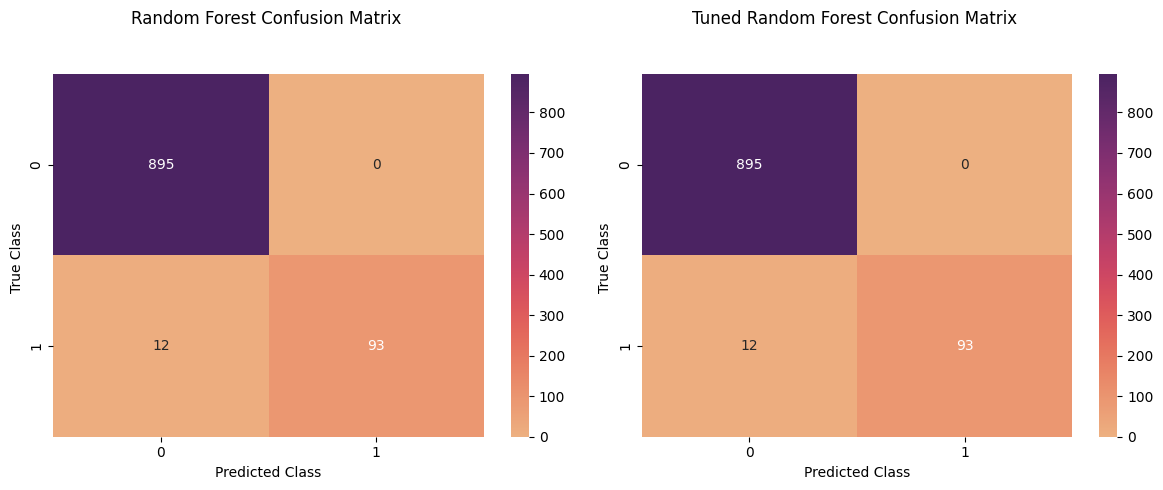

In [134]:
# Visualising the confusion matrix before Parameter Hypertuning
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
ax_rf = sns.heatmap(cm_rf, annot=True, cmap='flare', fmt='d')
ax_rf.set_title('Random Forest Confusion Matrix \n\n');
ax_rf.set_xlabel('Predicted Class')
ax_rf.set_ylabel('True Class ');

# Visualising the confusion matrix after Parameter Hypertuning

plt.subplot(1, 2, 2)
ax_tuned_rf = sns.heatmap(cm_tuned_rf, annot=True, cmap='flare', fmt='d')
ax_tuned_rf.set_title('Tuned Random Forest Confusion Matrix \n\n');
ax_tuned_rf.set_xlabel('Predicted Class')
ax_tuned_rf.set_ylabel('True Class ');

plt.tight_layout()
plt.show()

## Feature Importance

/tmp/ipython-input-1093883593.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_importances.head(top_n).values, y=sorted_importances.head(top_n).index, palette='viridis')


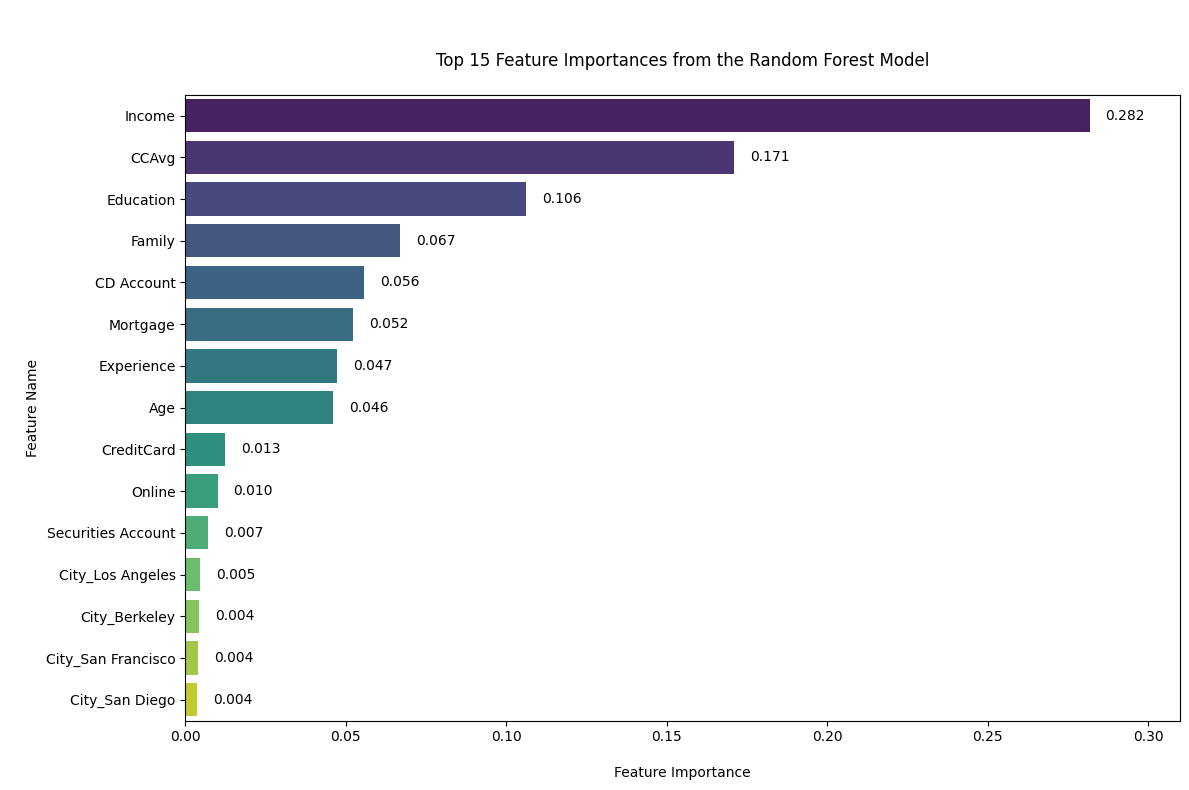


 Top 15 Feature Importances:
Income                0.281742
CCAvg                 0.171111
Education             0.106129
Family                0.066875
CD Account            0.055723
Mortgage              0.052243
Experience            0.047184
Age                   0.046147
CreditCard            0.012509
Online                0.010073
Securities Account    0.007134
City_Los Angeles      0.004617
City_Berkeley         0.004321
City_San Francisco    0.003847
City_San Diego        0.003822
dtype: float64


In [150]:
# Access feature_importances_ from the best_xgb_model
feature_importances = rf_classifier.feature_importances_

# Create a Pandas Series of feature importances, mapping them to the original feature names from X
feature_names = x_train.columns
feature_importances_series = pd.Series(feature_importances, index=feature_names)

# Sort the feature importances in descending order
sorted_importances = feature_importances_series.sort_values(ascending=False)

# We'll visualize the top 15 features
top_n = 15
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=sorted_importances.head(top_n).values, y=sorted_importances.head(top_n).index, palette='viridis')
plt.title(f'\n\nTop {top_n} Feature Importances from the Random Forest Model\n')
plt.xlabel('\nFeature Importance')
plt.ylabel('\nFeature Name')

# Add labels to the bars for exact values
for i, v in enumerate(sorted_importances.head(top_n).values):
    ax.text(v + 0.005, i, f'{v:.3f}', color='black', va='center') # Adjust x-position for label

plt.xlim(0, sorted_importances.head(top_n).max() * 1.1) # Adjust x-axis limit to fit labels
plt.tight_layout()
plt.show()

print(f"\n Top {top_n} Feature Importances:\n{sorted_importances.head(top_n)}")
